In [2]:
import os
import numpy as np
import pathlib
import glob
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

import matplotlib.image as mpimg

2024-01-06 00:42:30.666935: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
path_base_train = 'BigCats/train/' #directory for train images
os.makedirs(path_base_train, exist_ok=True)

path_base_test = 'BigCats/test' #directory for test images
os.makedirs(path_base_test, exist_ok=True)

In [4]:
path = os.path.join(path_base_train, 'AFRICAN LEOPARD/*') #path for first type of big cats
for file in glob.glob(path):
    new_file = file.replace('.JPG', '.jpg')
    os.rename(file, new_file)

path = os.path.join(path_base_train, 'LIONS/*') #path for second type of big cats
for file in glob.glob(path):
    new_file = file.replace('.JPG', '.jpg')
    os.rename(file, new_file)

path = os.path.join(path_base_train, 'TIGER/*') #path for third type of big cats
for file in glob.glob(path):
    new_file = file.replace('.JPG', '.jpg')
    os.rename(file, new_file)

In [5]:
images = pathlib.Path(path_base_train).with_suffix('')

afl_images = list(images.glob('AFRICAN LEOPARD/*.jpg'))
l_images = list(images.glob('LIONS/*.jpg'))
t_images = list(images.glob('TIGER/*.jpg'))

print(afl_images, l_images, t_images)

[PosixPath('BigCats/train/AFRICAN LEOPARD/189.jpg'), PosixPath('BigCats/train/AFRICAN LEOPARD/162.jpg'), PosixPath('BigCats/train/AFRICAN LEOPARD/176.jpg'), PosixPath('BigCats/train/AFRICAN LEOPARD/228.jpg'), PosixPath('BigCats/train/AFRICAN LEOPARD/214.jpg'), PosixPath('BigCats/train/AFRICAN LEOPARD/200.jpg'), PosixPath('BigCats/train/AFRICAN LEOPARD/016.jpg'), PosixPath('BigCats/train/AFRICAN LEOPARD/002.jpg'), PosixPath('BigCats/train/AFRICAN LEOPARD/003.jpg'), PosixPath('BigCats/train/AFRICAN LEOPARD/017.jpg'), PosixPath('BigCats/train/AFRICAN LEOPARD/201.jpg'), PosixPath('BigCats/train/AFRICAN LEOPARD/215.jpg'), PosixPath('BigCats/train/AFRICAN LEOPARD/229.jpg'), PosixPath('BigCats/train/AFRICAN LEOPARD/177.jpg'), PosixPath('BigCats/train/AFRICAN LEOPARD/163.jpg'), PosixPath('BigCats/train/AFRICAN LEOPARD/188.jpg'), PosixPath('BigCats/train/AFRICAN LEOPARD/149.jpg'), PosixPath('BigCats/train/AFRICAN LEOPARD/175.jpg'), PosixPath('BigCats/train/AFRICAN LEOPARD/161.jpg'), PosixPath('

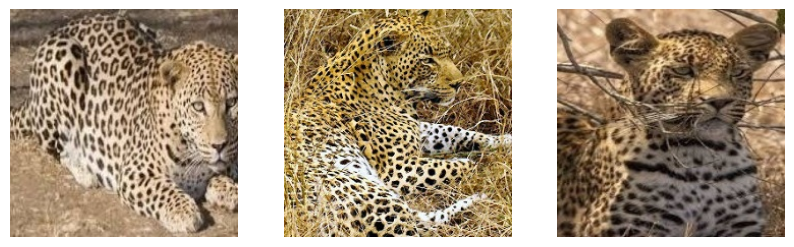

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for i, img_path in enumerate(afl_images[:3]):
  img = mpimg.imread(str(img_path))
  axes[i].imshow(img)
  axes[i].axis('off')
plt.show()

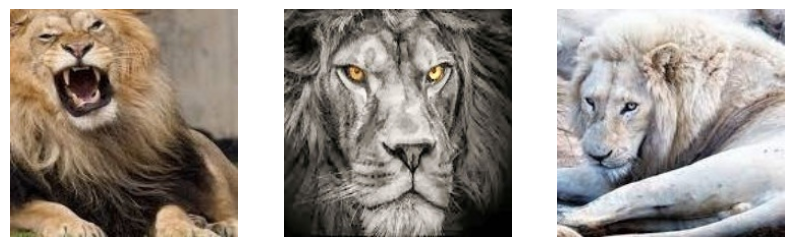

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for i, img_path in enumerate(l_images[:3]):
  img = mpimg.imread(str(img_path))
  axes[i].imshow(img)
  axes[i].axis('off')
plt.show()

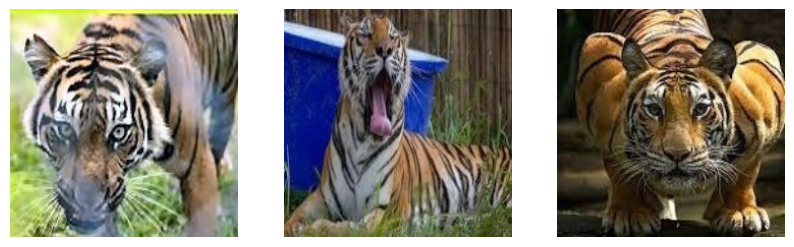

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for i, img_path in enumerate(t_images[:3]):
  img = mpimg.imread(str(img_path))
  axes[i].imshow(img)
  axes[i].axis('off')
plt.show()

In [9]:
batch_size = 32
image_height = 720
image_width = 1280

In [10]:
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip("horizontal", input_shape=(image_height, image_width, 3)),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1),
  ])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
train = keras.utils.image_dataset_from_directory(
    images, 
    validation_split=0.2, 
    subset="training", 
    seed=123, 
    image_size=(image_height, image_width), 
    batch_size=32
)

Found 701 files belonging to 3 classes.
Using 561 files for training.


In [12]:
class_names = train.class_names
print(class_names)

['AFRICAN LEOPARD', 'LIONS', 'TIGER']


In [13]:
val = keras.utils.image_dataset_from_directory(
    images, 
    validation_split=0.2, 
    subset="validation", 
    seed=123, 
    image_size=(image_height, image_width), 
    batch_size=batch_size
)

Found 701 files belonging to 3 classes.
Using 140 files for validation.


In [14]:
AUTOTUNE = tf.data.AUTOTUNE
train = train.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val = val.cache().prefetch(buffer_size=AUTOTUNE)

#### Deep learning model for image classification

In [15]:
model = keras.Sequential([
  data_augmentation,
  keras.layers.Rescaling(1./255),
  keras.layers.Conv2D(64, 3, strides=2, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'),
  keras.layers.BatchNormalization(),
  keras.layers.Conv2D(128, 3, strides=2, padding='same', activation='tanh'),
  keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'),
  keras.layers.BatchNormalization(),
  keras.layers.Dropout(0.3),
  keras.layers.Conv2D(256, 3, strides=2, padding='same', activation='tanh'),
  keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'),
  keras.layers.BatchNormalization(),
  keras.layers.Flatten(),
  keras.layers.Dense(256, activation='sigmoid'),
  keras.layers.Dense(3, name="outputs")
])

#### Display information about the created model, its dimensions and the number of parameters.

In [16]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ sequential (Sequential)         │ ?                         │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ rescaling (Rescaling)           │ ?                         │          0 │
│                                 │                           │  (unbuilt) │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d (Conv2D)                 │ ?                         │          0 │
│                                 │                           │  (unbuilt) │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                         │          0 │
│                                 │                           │  (unbuilt) │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization             │ ?                         │          0 │
│ (BatchNormalization)            │                           │  (unbuilt) │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_1 (Conv2D)               │ ?                         │          0 │
│                                 │                           │  (unbuilt) │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                         │          0 │
│                                 │                           │  (unbuilt) │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_1           │ ?                         │          0 │
│ (BatchNormalization)            │                           │  (unbuilt) │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout (Dropout)               │ ?                         │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_2 (Conv2D)               │ ?                         │          0 │
│                                 │                           │  (unbuilt) │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                         │          0 │
│                                 │                           │  (unbuilt) │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_2           │ ?                         │          0 │
│ (BatchNormalization)            │                           │  (unbuilt) │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten (Flatten)               │ ?                         │          0 │
│                                 │                           │  (unbuilt) │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense (Dense)                   │ ?                         │          0 │
│                                 │                           │  (unbuilt) │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ outputs (Dense)                 │ ?                         │          0 │
│                                 │                           │  (unbuilt) │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

In [18]:
model.fit(train, validation_data = val, epochs=5)

Epoch 1/5


18/18 ━━━━━━━━━━━━━━━━━━━━ 559s 28s/step - accuracy: 0.5191 - loss: 1.8429 - val_accuracy: 0.4214 - val_loss: 0.9977
Epoch 2/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 559s 32s/step - accuracy: 0.7306 - loss: 0.6316 - val_accuracy: 0.3357 - val_loss: 1.8563
Epoch 3/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 530s 29s/step - accuracy: 0.8073 - loss: 0.5322 - val_accuracy: 0.3357 - val_loss: 2.2338
Epoch 4/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 546s 30s/step - accuracy: 0.7696 - loss: 0.5599 - val_accuracy: 0.3357 - val_loss: 2.4046
Epoch 5/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 554s 31s/step - accuracy: 0.8108 - loss: 0.4668 - val_accuracy: 0.3357 - val_loss: 2.8094


#### Using a pre-trained model for image classification

Використовується вже навчена модель для класифікації конкретного зображення і виведення результату та впевненості моделі в прогнозі.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
tf.Tensor([2.9271154e-04 9.9646437e-01 3.2429523e-03], shape=(3,), dtype=float32)
That's a LIONS!
Confidence: 99.65 %.


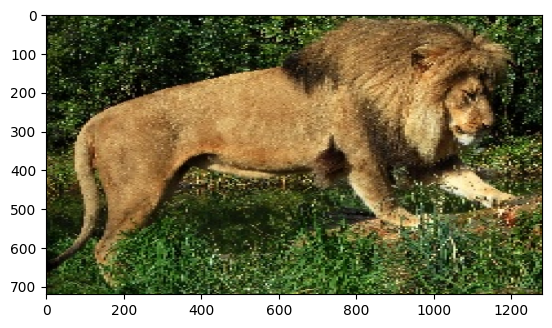

In [22]:
image = tf.keras.preprocessing.image.load_img( os.path.join(path_base_test, 'LIONS/5.jpg'), target_size=((image_height, image_width)))
plt.imshow(image)

input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])

input_arr = input_arr.astype('float32') / 255.

predictions = model.predict(input_arr)
score = tf.nn.softmax(predictions[0])
print(score)
print("That's a {}!".format(class_names[np.argmax(score)]))
print("Confidence: {:.2f} %.".format(100 * np.max(score)))